### This notebook is for transferring the necessary data from the GDELT s3 bucket of amazon to our CPT bucket

note. The aws access key id and aws secret access key was turned into `none` for privacy purposes. If ever you want to try this code, please use your own access key.

In [8]:
import boto3
from botocore.exceptions import NoCredentialsError
import re
from datetime import datetime, timedelta

s3 = (boto3
      .client('s3', aws_access_key_id='none',
                  aws_secret_access_key='none'))


### We will be using gdelt data from July 1 of 2016-2019, to satisfy the requirement of the project

In [9]:
source_bucket = 'gdelt-open-data'
destination_bucket = 'bdcc2024-fp-cpt6'
prefix = 'events/'
start_date = '20160701'
end_date = '20190701'

In [13]:
def generate_date_range(start, end):
    start_date = datetime.strptime(start, '%Y%m%d')
    end_date = datetime.strptime(end, '%Y%m%d')
    date_list = []

    while start_date <= end_date:
        date_list.append(start_date.strftime('%Y%m%d'))
        start_date += timedelta(days=1)

    return date_list

dates = generate_date_range(start_date, end_date)

In [18]:
import re

pattern = re.compile(r'(' + '|'.join(dates) + r').*\.csv$')

matching_files = []

paginator = s3.get_paginator('list_objects_v2')
pages = paginator.paginate(Bucket=source_bucket, Prefix=prefix)

for page in pages:
    for obj in page.get('Contents', []):
        if pattern.search(obj['Key']):
            matching_files.append(obj['Key'])

In [19]:
matching_files

['events/20160701.export.csv',
 'events/20160702.export.csv',
 'events/20160703.export.csv',
 'events/20160704.export.csv',
 'events/20160705.export.csv',
 'events/20160706.export.csv',
 'events/20160707.export.csv',
 'events/20160708.export.csv',
 'events/20160709.export.csv',
 'events/20160710.export.csv',
 'events/20160711.export.csv',
 'events/20160712.export.csv',
 'events/20160713.export.csv',
 'events/20160714.export.csv',
 'events/20160715.export.csv',
 'events/20160716.export.csv',
 'events/20160717.export.csv',
 'events/20160718.export.csv',
 'events/20160719.export.csv',
 'events/20160720.export.csv',
 'events/20160721.export.csv',
 'events/20160722.export.csv',
 'events/20160723.export.csv',
 'events/20160724.export.csv',
 'events/20160725.export.csv',
 'events/20160726.export.csv',
 'events/20160727.export.csv',
 'events/20160728.export.csv',
 'events/20160729.export.csv',
 'events/20160730.export.csv',
 'events/20160731.export.csv',
 'events/20160801.export.csv',
 'events

In [24]:
def copy_to_bucket(source_bucket, destination_bucket, files):
    for file_key in files:
        copy_source = {'Bucket': source_bucket, 'Key': file_key}
        destination_key = file_key  # Retain the prefix in the destination key
        try:
            s3.copy(copy_source, destination_bucket, destination_key)
            print(f'Successfully copied {file_key} to {destination_bucket}/{destination_key}')
        except NoCredentialsError:
            print('Credentials not available')

In [25]:
copy_to_bucket(source_bucket, destination_bucket, matching_files)

Successfully copied events/20160701.export.csv to bdcc2024-fp-cpt6/events/20160701.export.csv
Successfully copied events/20160702.export.csv to bdcc2024-fp-cpt6/events/20160702.export.csv
Successfully copied events/20160703.export.csv to bdcc2024-fp-cpt6/events/20160703.export.csv
Successfully copied events/20160704.export.csv to bdcc2024-fp-cpt6/events/20160704.export.csv
Successfully copied events/20160705.export.csv to bdcc2024-fp-cpt6/events/20160705.export.csv
Successfully copied events/20160706.export.csv to bdcc2024-fp-cpt6/events/20160706.export.csv
Successfully copied events/20160707.export.csv to bdcc2024-fp-cpt6/events/20160707.export.csv
Successfully copied events/20160708.export.csv to bdcc2024-fp-cpt6/events/20160708.export.csv
Successfully copied events/20160709.export.csv to bdcc2024-fp-cpt6/events/20160709.export.csv
Successfully copied events/20160710.export.csv to bdcc2024-fp-cpt6/events/20160710.export.csv
Successfully copied events/20160711.export.csv to bdcc2024-f

Finally, we got the following amoung of data.

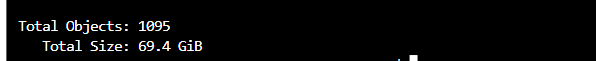